# Publication Author Analysis 

## Objective
### A text mining analysis of Covid-19 related publications across OSU to discover the abstract topics that occur in a collection of documents.

## Data Source
### Elements Coronavirus Publications report

## Scope of Analysis
### TimeFrame: 3/1/2020 - Present

### Importing required packages

In [9]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
from mycolorpy import colorlist as mcp
import squarify 

### Importing the base dataset

In [44]:
df = pd.read_csv(r'C:\Users\ammitra\OneDrive - Oklahoma A and M System\Experts\Coronavirus_Output\Data\Coronavirus Publications - generated 2021-12-09 10-34.csv')

### Data Cleaning Operations
#### a) Subset all publications after March 1st 2020 based on Publication date.
#### b) The title column have been cleaned to remove punctuations and convert them to lowercase. The extra white spaces have also been removed.
#### b) Author's department name has been combined with their First and Last Name.

In [48]:
df['publication-date'] = pd.to_datetime(df['publication-date'])
df = df[df['publication-date'] >= '3/1/2020']

In [11]:
df['title_cleaned'] = df['title'].str.replace('[{}]'.format(string.punctuation), '').str.lower()
df['title_cleaned'] = df['title_cleaned'].str.strip()

In [12]:
df['Full Name'] = df['First Name'] +' '+df['Last Name']+ ' ( '+ df['Primary Group Descriptor']+' ) '

In [13]:
df.head()

,ID,Group ID,First Name,Last Name,Username,Email,User's proprietary ID,Primary Group Descriptor,Department,Publication ID,...,issue,eissn,publisher,name-of-conference,Data Source,Citation Count,Publication Privacy Level,Relationship Privacy Level,title_cleaned,Full Name
0,3138,108,Pratul,Agarwal,praagar,pratul.agarwal@okstate.edu,A20257104,VP For Research,VP For Research,168203,...,NaN,1664-8021,NaN,NaN,Scopus,1.0,Public,Internal,sarscov2 genomes from oklahoma united states,Pratul Agarwal ( VP For Research )
1,2540,10,Tutaleni,Asino,tutalen,tutaleni.asino@okstate.edu,A11800758,College of Educ and Human Sci,"Ed Fndn, Ldrshp & Aviation (SEFLA)",168447,...,1,NaN,Asian Society of Open and Distance Education,NaN,Manual,NaN,Public,Public,a global outlook to the interruption of educat...,Tutaleni Asino ( College of Educ and Human Sci )
2,2660,2,Arunkumar,Bagavathi,abagava,abagava@okstate.edu,A20243938,Dean of Arts and Sciences,Computer Science,198704,...,NaN,1611-3349,NaN,NaN,Scopus,0.0,Public,Public,mgnet leveraging pseudoimaging for multimodal ...,Arunkumar Bagavathi ( Dean of Arts and Science...
3,2660,2,Arunkumar,Bagavathi,abagava,abagava@okstate.edu,A20243938,Dean of Arts and Sciences,Computer Science,196420,...,NaN,NaN,NaN,NaN,arXiv,NaN,Public,Public,mgnet leveraging pseudoimaging for multimodal ...,Arunkumar Bagavathi ( Dean of Arts and Science...
4,1638,2,Amanda,Baraldi,baraldi,baraldi@okstate.edu,A11800068,Dean of Arts and Sciences,Psychology,195738,...,NaN,1096-0465,NaN,NaN,Scopus,0.0,Public,Internal,faith and science mindsets as predictors of co...,Amanda Baraldi ( Dean of Arts and Sciences )


### Exploratory Data Analysis

#### a) The Publication ID has been counted for every author in every department and stored in a dataframe.
#### b) A different color scheme has been specified for every department for the below mentioned plots.
#### c) The legends specify the departments in both the plots.

In [14]:
author_counts = df.groupby(['Full Name','Primary Group Descriptor'])['Publication ID'].count().to_frame().reset_index()

In [15]:
author_counts

,Full Name,Primary Group Descriptor,Publication ID
0,Ada Cino Ozuna ( Dean of Veterinary Medicine ),Dean of Veterinary Medicine,2
1,Akansha Singh ( Dean of Veterinary Medicine ),Dean of Veterinary Medicine,1
2,Akhilesh Ramachandran ( Dean of Veterinary Med...,Dean of Veterinary Medicine,4
3,Ali Mirchi ( Div of Agriculture Sci & Nat Rsrc...,Div of Agriculture Sci & Nat Rsrcs,1
4,Amanda Baraldi ( Dean of Arts and Sciences ),Dean of Arts and Sciences,1
5,Andrew Luse ( Dean of Business Administration ),Dean of Business Administration,1
6,Anil Kaul ( COO ),COO,2
7,Anna Lennard ( Dean of Business Administration ),Dean of Business Administration,1
8,Anthony Confer ( Dean of Veterinary Medicine ),Dean of Veterinary Medicine,5
9,Arunkumar Bagavathi ( Dean of Arts and Science...,Dean of Arts and Sciences,2


In [21]:
groups = author_counts['Primary Group Descriptor'].unique()
norm = cm.colors.Normalize(vmin=0, vmax=1000)
color2=mcp.gen_color(cmap="Paired",n=16)

In [22]:
### Specifying color scheme for every department ###

group_colors = {}
unique_users = list(set(groups)) 
step_size = 100
for i, user in enumerate(unique_users):
    group_colors[user] = color2[i+1]

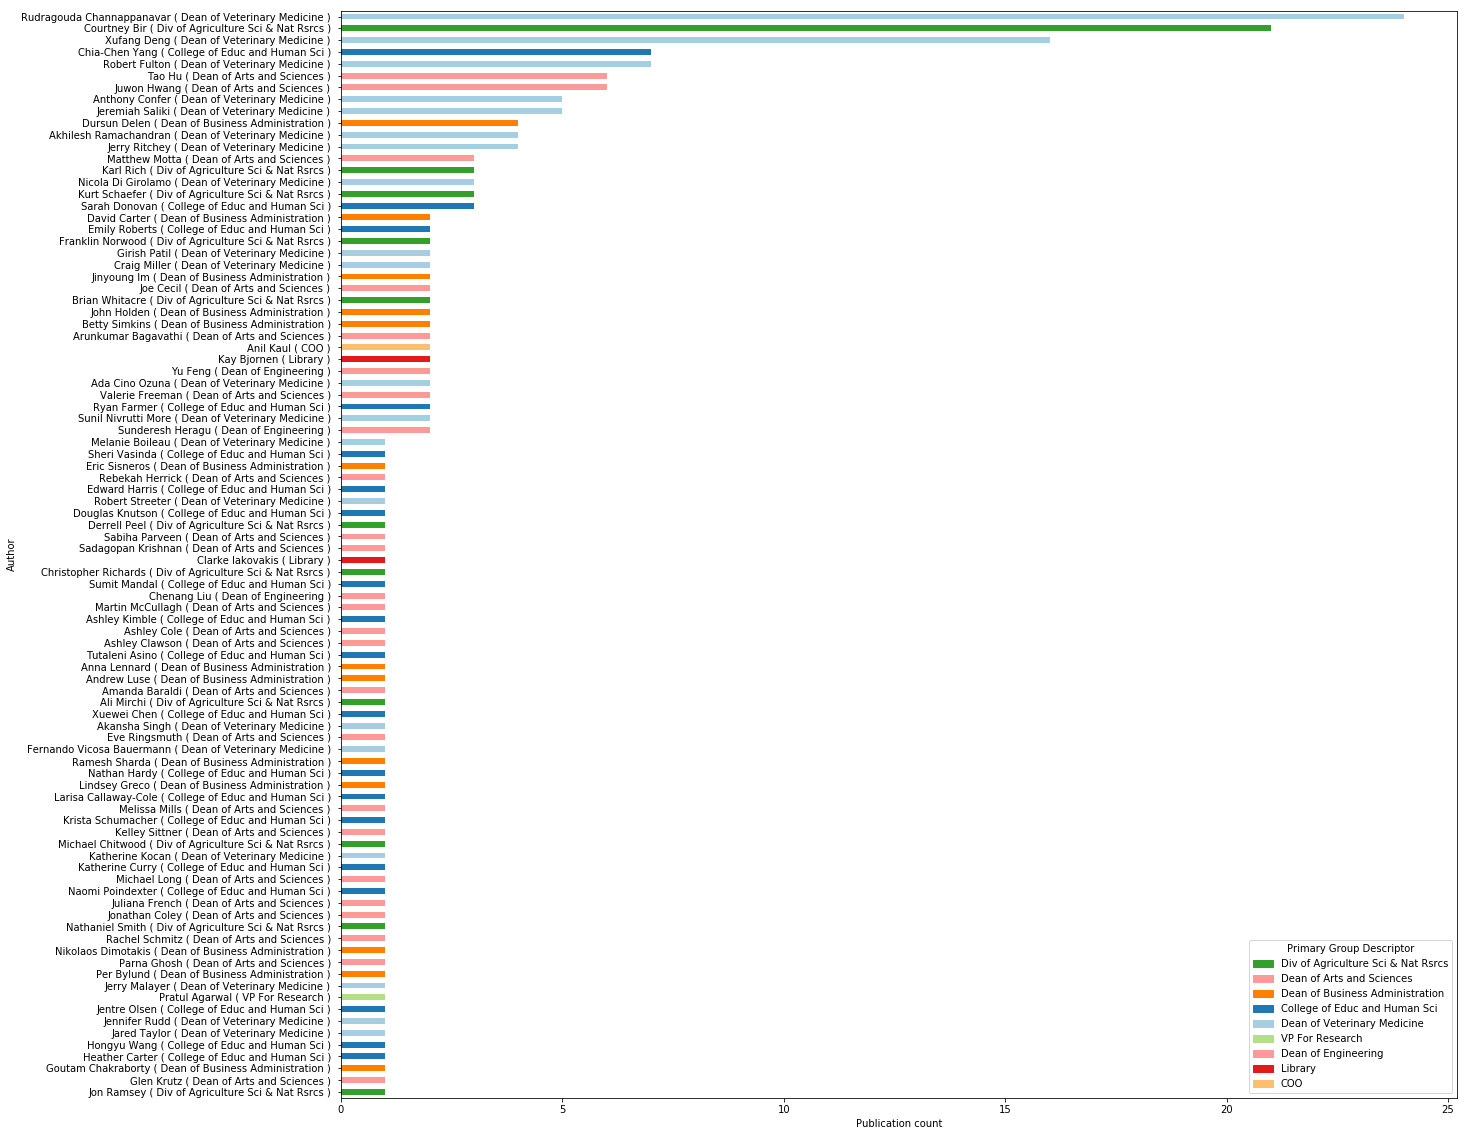

In [23]:
### Author count plot ###

author_counts = author_counts.sort_values('Publication ID')
s = pd.Series(author_counts.iloc[:,2].values, index=author_counts.iloc[:,0])

plt.figure(figsize=(20,20))
s.plot(kind='barh', color=[group_colors[i] for i in author_counts['Primary Group Descriptor']])

labels = author_counts['Primary Group Descriptor'].unique()
handles = [plt.Rectangle((0,0),1,1, color=group_colors[l]) for l in labels]
plt.legend(handles, labels, title='Primary Group Descriptor')
plt.xlabel("Publication count")
plt.ylabel("Author")

plt.show()


In [ ]:
#### Publication count Plot #####

In [30]:
group_counts = df.groupby(['Primary Group Descriptor'])['Publication ID'].count().to_frame().reset_index()
group_counts['color']= group_counts['Primary Group Descriptor'].map(group_colors)
group_counts['perc']= group_counts['Publication ID']/group_counts['Publication ID'].sum()

In [33]:
group_counts.sort_values('perc', ascending=False)

,Primary Group Descriptor,Publication ID,color,perc
5,Dean of Veterinary Medicine,84,#a6cee3,0.385321
2,Dean of Arts and Sciences,37,#fb9a99,0.169725
6,Div of Agriculture Sci & Nat Rsrcs,37,#33a02c,0.169725
1,College of Educ and Human Sci,29,#1f78b4,0.133028
3,Dean of Business Administration,20,#ff7f00,0.091743
4,Dean of Engineering,5,#fb9a99,0.022936
7,Library,3,#e31a1c,0.013761
0,COO,2,#fdbf6f,0.009174
8,VP For Research,1,#b2df8a,0.004587


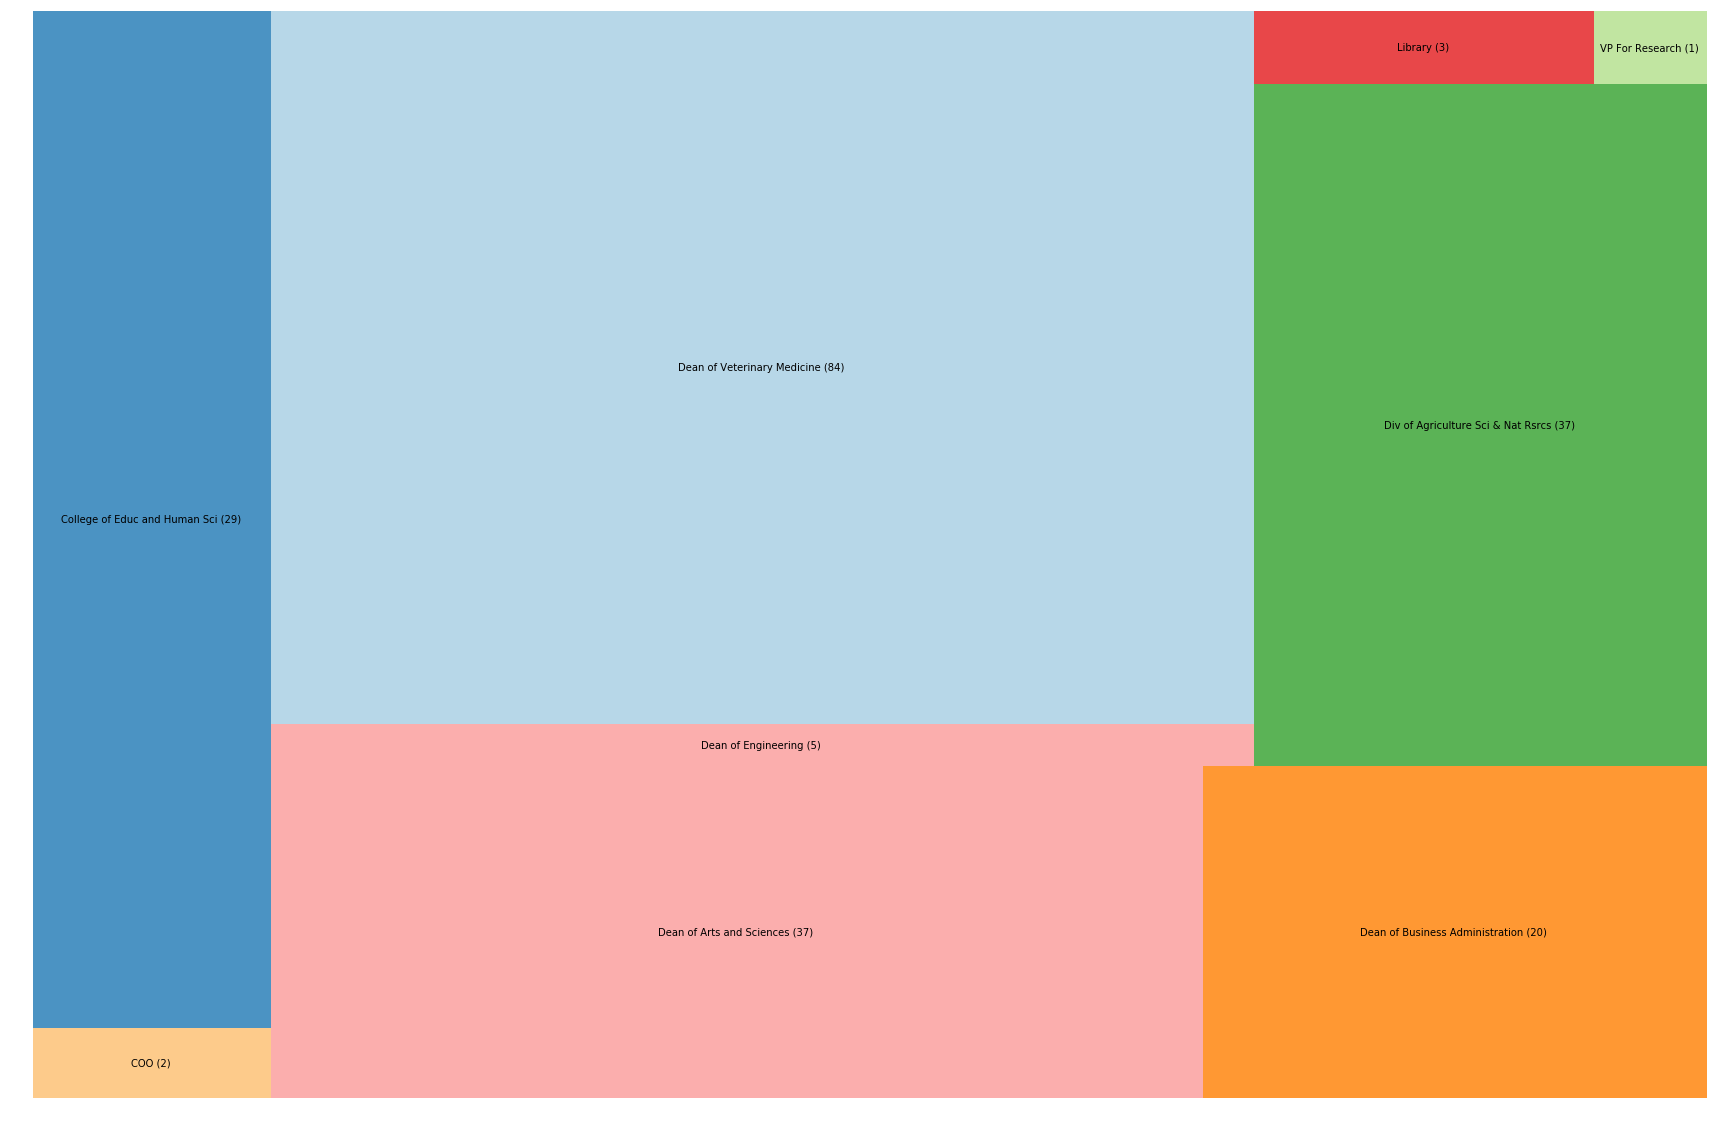

In [28]:
# Author count plot
group_counts['labels'] = group_counts['Primary Group Descriptor']+ ' (' + group_counts['Publication ID'].astype(str) +') '
plt.figure(figsize=(30,20))
squarify.plot(sizes=group_counts['Publication ID'], label=group_counts['labels'],color=group_counts['color'],alpha=.8)
plt.axis('off')
plt.show()

### Insights

#### a) Dean of Veterinary Medicine has the largest number of  (84).
#### b) Dean of Veterinary Medicine	, Dean of Arts and Sciences and Div of Agriculture Sci & Nat Rsrcs com comprise 70% of the publications related to Covid-19